In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv") #Cleaned Data
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df=df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
X=df.drop(['FWI','Classes','region'],axis=1)
y=df['FWI']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000


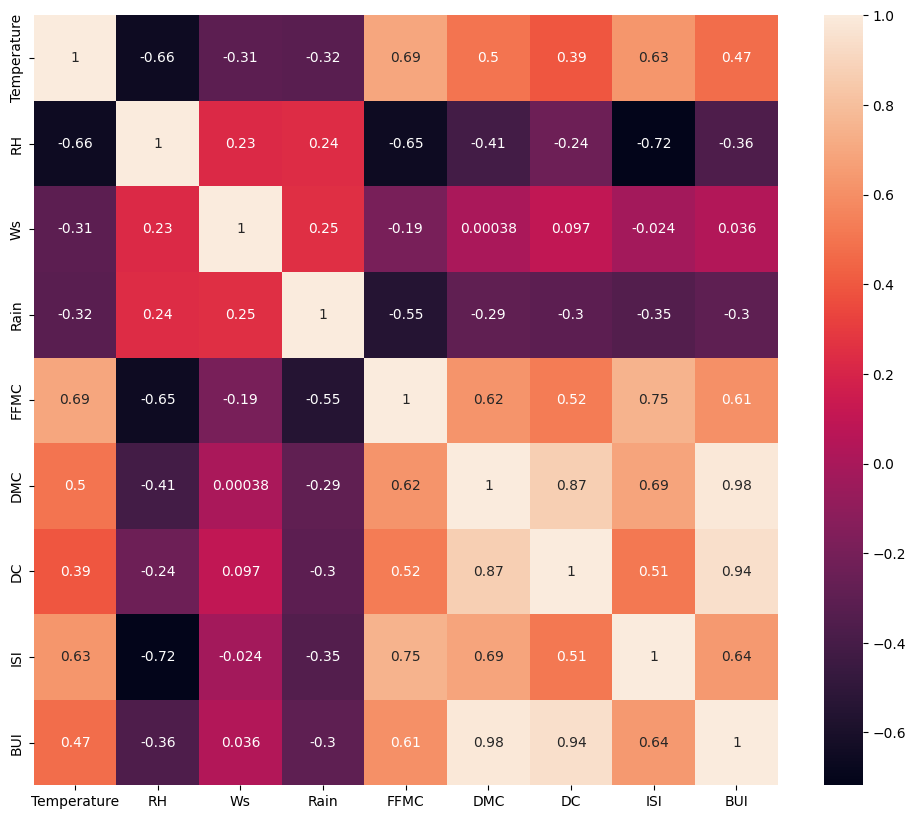

In [7]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
corr

In [8]:
def correlation(dataset,threshold):
    high_corr=set()
    corr_matrix=dataset.corr()

    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                high_corr.add(corr_matrix.columns[j])
    return high_corr

In [9]:
high_corr=correlation(X_train,0.8)

In [10]:
X_train=X_train.drop(high_corr,axis=1)
X_test=X_test.drop(high_corr,axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

LinearRegression R2 Score: 0.9880450087357835


Text(0.5, 1.0, 'LinearRegression')

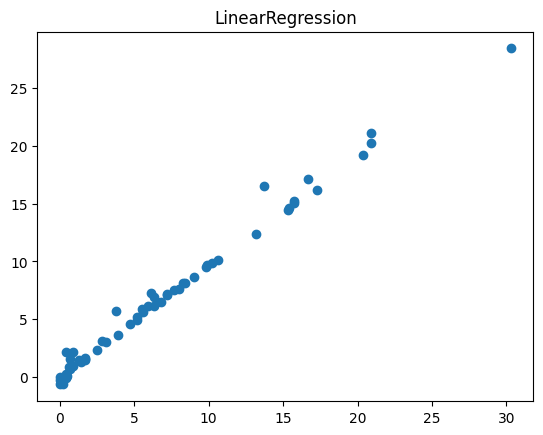

In [60]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred=linear_regression.predict(X_test)
from sklearn.metrics import r2_score
print("LinearRegression R2 Score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("LinearRegression")

Ridge R2 Score: 0.9876232350660525


Text(0.5, 1.0, 'Ridge')

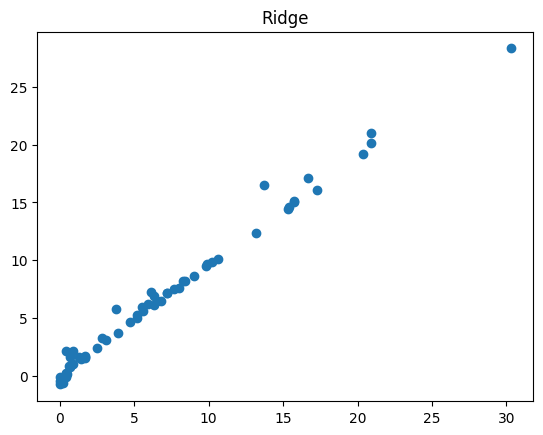

In [57]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print("Ridge R2 Score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("Ridge")

Lasso R2 Score: 0.9558984658448342


Text(0.5, 1.0, 'Lasso')

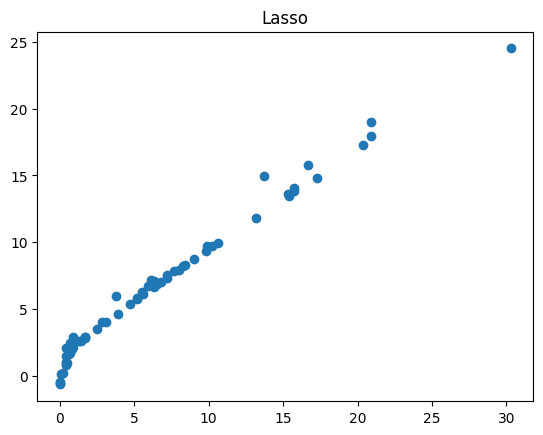

In [56]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print("Lasso R2 Score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("Lasso")

0.8737903380624359


Text(0.5, 1.0, 'ElasticNet')

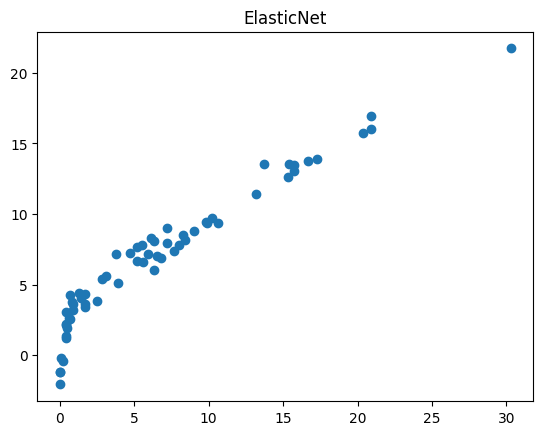

In [17]:
#ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(X_train,y_train)
y_pred=elastic_net.predict(X_test)
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("ElasticNet")

RidgeCV R2 Score: 0.9876232350660525
Alphas: (0.1, 1.0, 10.0)
Selected Alpha 1.0


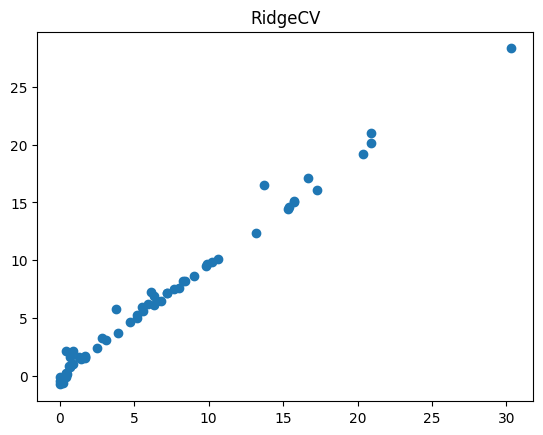

In [49]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
print("RidgeCV R2 Score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("RidgeCV")
print("Alphas:",ridgecv.alphas)
print("Selected Alpha",ridgecv.alpha_)

LassoCV R2 Score: 0.9871887551893376
Selected Alpha 0.05725391318234405


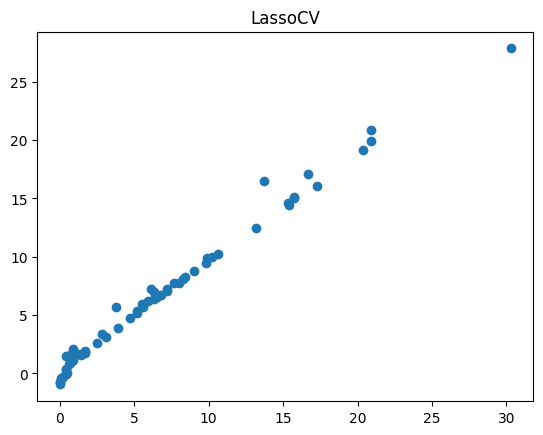

In [61]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)
y_pred=lassocv.predict(X_test)
print("LassoCV R2 Score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("LassoCV")
print("Selected Alpha",lassocv.alpha_)

ElasticNetCV R2 Score: 0.9850246085140978
Selected Alpha 0.04622700712786234


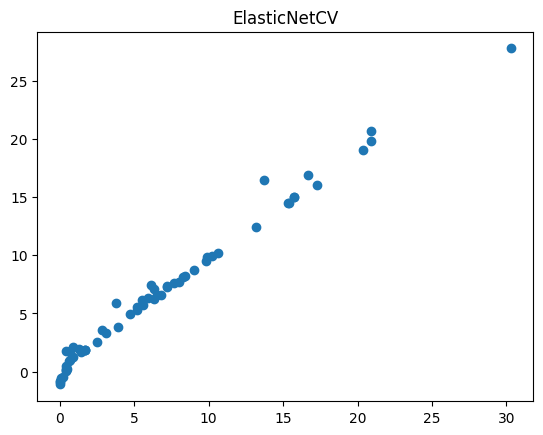

In [54]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train,y_train)
y_pred=elasticnetcv.predict(X_test)
print("ElasticNetCV R2 Score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.title("ElasticNetCV")
print("Selected Alpha",elasticnetcv.alpha_)